# Credit Card Fraud Detection 
___

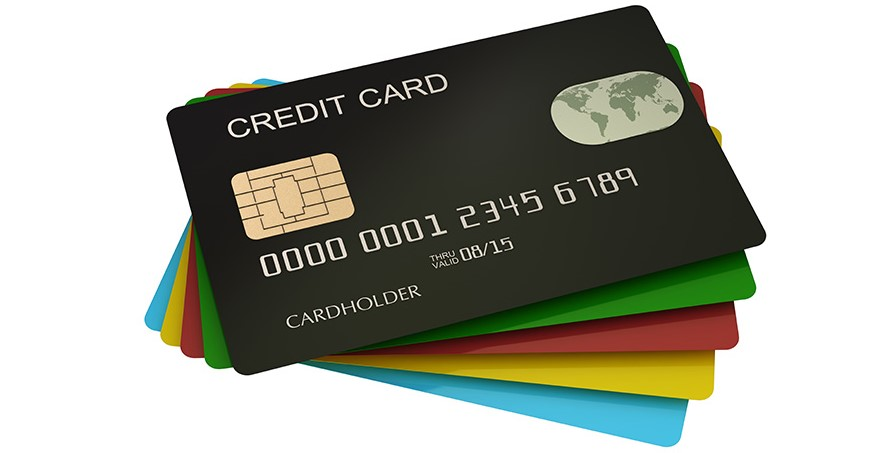

___
**About this project:**
In this credit cred fraud detection project there are legitamal transactions and fraud transactions. We need to detect the fraud transactions and legitamal transactions by classifying and model training with machine learning. This dataset is highly imbalance. so we need to reshape it to classify the data.

In [118]:
# import data analysis libraries
import numpy as np
import pandas as pd

# import visualzation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* Luckly we've got 0 null values.

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Observation:**
* Here Class varaible which type of transactions they did.
* 0 denotes Noraml Transaction. The Normal transactions are 2,84,315.
* 1 denotes Fraudulant Transaction. The fraud transactions are 492.

___
* To know how much normal transactions happend and fraud transactions happend, Let's split the Class variable into legit dataframe and fraud dataframe. which will divide into two dataframes and we can see how transaction happend.

In [6]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [7]:
legit.shape, fraud.shape

((284315, 31), (492, 31))

**Observation:**
* We can see the data split into two dataframes like as we have seen before in the value counts. **And, Let's find the transactions.**

In [8]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Observation:**
* We can observe (legit amount) highest normal transaction amount is 25,691 US dollars.
* (fraud amount) Highest fraud transaction amount is 2,125 US dollars.

___
## Under-Sampling
* Now split the legit amount dataframe to match the fraudulant dataframe. which will be equal while we are building a model.
* Let's check the values of class variable to see how much change happening during splitting the legit data.

In [10]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [11]:
# split legit dataframe equal to fraud dataframe
legit_split = legit.sample(n=492)

In [15]:
# create a new class variable
New_Class = pd.concat([legit_split,fraud],axis=0)
New_Class.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65802,51751.0,1.276674,-1.553579,1.184923,-1.424114,-2.087630,0.071680,-1.694116,0.135485,-1.558572,...,0.162319,0.700578,-0.135564,0.023235,0.204984,-0.048915,0.067045,0.040675,98.00,0
43725,41632.0,-1.734799,-0.270541,2.576656,-0.211643,0.198753,-0.786182,0.464878,0.128511,-0.148360,...,0.296556,0.279545,0.126761,0.346871,0.585835,-0.609437,-0.025695,0.098306,144.00,0
245885,152951.0,-0.546058,0.450457,1.348776,-0.721257,0.124740,-0.820035,0.432835,0.010325,0.245878,...,-0.176296,-0.443049,0.191160,0.038009,-0.858955,0.168583,0.363094,0.252520,22.98,0
97244,66125.0,-0.283992,1.114020,0.943403,-0.135036,0.443157,-0.498922,0.706245,-0.026228,-0.354735,...,-0.316948,-0.834829,-0.116965,-0.503943,-0.044380,0.123520,0.244831,0.090106,4.49,0
57558,47960.0,1.026009,-1.027764,0.060881,0.470856,-0.517047,0.867099,-0.567844,0.174774,-0.392753,...,-0.351558,-0.783317,-0.258131,-1.373288,0.468167,-0.234669,0.047746,0.044452,177.43,0


In [21]:
New_Class['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

* we can see this new dataframe contains equally 492 values for legit and fraud transactions in Class variable. Now we are going to use this dataframe for model building.

<Axes: xlabel='Class', ylabel='count'>

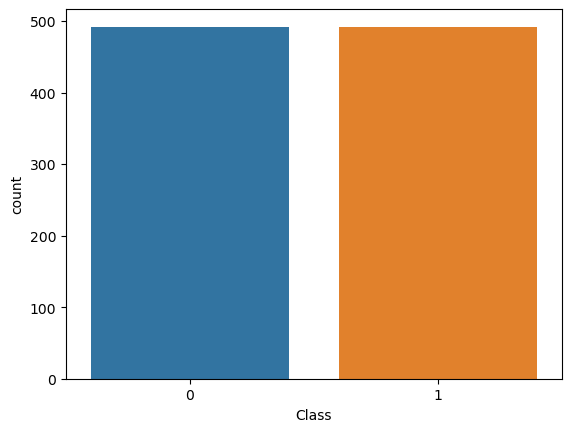

In [38]:
sns.countplot(data=New_Class, x='Class')

* By visualization we can see both are equal for model building

In [19]:
New_Class.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94565.176829,-0.000370,0.114978,0.057763,-0.162959,0.012473,-0.109086,0.029363,0.004472,0.013316,...,-0.030606,0.057344,-0.025902,-0.008584,0.009027,-0.007051,-0.033144,-0.008041,-0.010842,69.932195
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


* The mean value of v1 had no change after splitting the Class legit data.

## Split the Data

In [41]:
x = New_Class.drop(columns='Class',axis=1)
y = New_Class['Class']

In [46]:
x,y

(            Time        V1        V2        V3        V4        V5        V6  \
 65802    51751.0  1.276674 -1.553579  1.184923 -1.424114 -2.087630  0.071680   
 43725    41632.0 -1.734799 -0.270541  2.576656 -0.211643  0.198753 -0.786182   
 245885  152951.0 -0.546058  0.450457  1.348776 -0.721257  0.124740 -0.820035   
 97244    66125.0 -0.283992  1.114020  0.943403 -0.135036  0.443157 -0.498922   
 57558    47960.0  1.026009 -1.027764  0.060881  0.470856 -0.517047  0.867099   
 ...          ...       ...       ...       ...       ...       ...       ...   
 279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
 280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
 280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
 281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
 281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   
 
               V7        V

## Training the Data

$stratify=y,$

In [54]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=42)

In [55]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
256047,157518.0,-0.376172,-0.279897,-0.043716,-2.361372,0.137366,-0.922046,0.644769,-0.096398,-1.210164,...,0.285122,0.617073,1.557734,-0.045641,-0.319459,-0.310607,-0.131993,0.363494,0.255982,95.85
213116,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30
9509,14152.0,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22460,32258.0,1.492344,-0.567568,-0.503925,-1.161050,-0.095727,0.125960,-0.542447,0.005522,-0.937717,...,0.105641,0.146382,0.286240,-0.337199,-1.369419,0.807069,-0.025651,-0.017623,-0.017423,17.56
187084,127377.0,1.723024,-0.671890,-1.221667,0.494766,-0.226134,0.133731,-0.543442,0.190516,1.254266,...,0.066180,0.247085,0.592081,-0.055504,0.260118,-0.072394,-0.208479,0.014670,0.001543,134.41
189587,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90
164931,117084.0,1.046873,-1.816050,-2.608729,0.131919,0.796255,1.276401,0.617104,0.146024,0.098783,...,0.708355,0.426441,0.279770,-0.315463,-0.869219,-0.240134,0.726296,-0.157260,-0.012268,490.00


In [56]:
y_train

258403    1
142557    1
256047    0
213116    1
9509      1
         ..
22460     0
187084    0
189587    1
164931    0
255365    0
Name: Class, Length: 787, dtype: int64

## Model Building

In [123]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [124]:
y_lr_pred = lr.predict(x_test)
y_lr_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
y_rf_pred = rf.predict(x_test)
y_rf_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

## Model Evaluation

In [127]:
# logisticRegression
accuracy_result = accuracy_score(y_test, y_lr_pred)
accuracy_result

0.934010152284264

In [128]:
# logisticRegression
f1_result = f1_score(y_test,y_lr_pred)
f1_result

0.9319371727748691

In [129]:
# logisticRegression
precision_result = precision_score(y_test,y_lr_pred)
precision_result

0.956989247311828

In [146]:
# RandomForestClassifier
accuracy_result = accuracy_score(y_test, y_rf_pred)
accuracy_result

0.9390862944162437

In [147]:
# RandomForestClassifier
f1_result = f1_score(y_test,y_rf_pred)
f1_result

0.9347826086956522

In [148]:
# RandomForestClassifier
precision_result = precision_score(y_test,y_rf_pred)
precision_result

1.0

In [150]:
Evaluation_table = [['Logistic Regression',0.934010152284264, 0.9319371727748691, 0.956989247311828],
                    ['RandomForest',0.9390862944162437,0.9347826086956522,1.0]]

Column_names = ['Classification Algorithm','Accuracy_Score', 'F1_Score','Precision_Score']

Evaluation_data = pd.DataFrame(Evaluation_table, columns=Column_names)

Evaluation_data

,Classification Algorithm,Accuracy_Score,F1_Score,Precision_Score
0,Logistic Regression,0.934010,0.931937,0.956989
1,RandomForest,0.939086,0.934783,1.000000


**Observation:**
* From the above table we can observe for Logistic Regression Precision_score is showing 95% score and it is almost 100% as well as Accuracy_score, F1_score too.
* For Random Forest Precision_score is showing 1.0 score it is exact 100% as well as Accuracy_score, F1_score too.

___
## Thank You